# Agriculture Crop Yield - Prediction Model





The main objective of this project is to build a predictive model capable of estimating crop yield (tons per hectare) based on environmental, agronomic, and management factors. The focus is on prediction rather than interpretation, as the ultimate value lies in anticipating productivity outcomes before harvest. Accurate predictions provide significant benefits for stakeholders: farmers can optimize resource allocation (fertilizer, irrigation, labor), policymakers can plan for food security, and agribusiness companies can improve supply chain forecasting. By turning raw data into actionable foresight, this analysis helps reduce uncertainty and supports better decision-making in agriculture.

## Description of the Dataset


The dataset consists of 1,000,000 agricultural records, each representing a crop instance with multiple attributes that influence yield. Key variables include:

Region: Geographic location (North, East, South, West)

Soil_Type: Type of soil (Clay, Sandy, Loam, Silt, Peaty, Chalky)

Crop: Type of crop (Wheat, Rice, Maize, Barley, Soybean, Cotton)

Rainfall_mm: Rainfall during growth (mm)

Temperature_Celsius: Average temperature during growth (°C)

Fertilizer_Used: Whether fertilizer was applied (Yes/No)

Irrigation_Used: Whether irrigation was applied (Yes/No)

Weather_Condition: Seasonal weather (Sunny, Rainy, Cloudy)

Days_to_Harvest: Growth cycle length (days)

Yield_tons_per_hectare: Target variable (tons per hectare)

The aim is to leverage these variables to train predictive models that estimate yield with high accuracy. This enables us to answer the key business question: Given the crop type, environmental conditions, and management practices, what is the expected yield?

## EDA for Agriculture Crop Yield Dataset
Conduct exploratory data analysis (EDA) on the "crop_yield.csv" dataset. The EDA should include visualizations of feature distributions, class representation, histograms, and relevant patterns between features.

### Load the data


Load the `crop_yield.csv` file into a pandas DataFrame and display the first 5 rows and the columns and their types to get a sense of the data.


In [ ]:
import pandas as pd

df = pd.read_csv(r"capstone\dataset\crop_yield.csv")
display(df.head())
display(df.info())

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


None

In [2]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


### Check for missing values

### Subtask:
Check for missing values and visualize them to understand the extent of missingness.


**Reasoning**:
Calculate and print the number and percentage of missing values for each column, then visualize the percentage of missing values using a bar plot.



Number of Missing Values per Column:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

Percentage of Missing Values per Column:
Region                    0.0
Soil_Type                 0.0
Crop                      0.0
Rainfall_mm               0.0
Temperature_Celsius       0.0
Fertilizer_Used           0.0
Irrigation_Used           0.0
Weather_Condition         0.0
Days_to_Harvest           0.0
Yield_tons_per_hectare    0.0
dtype: float64


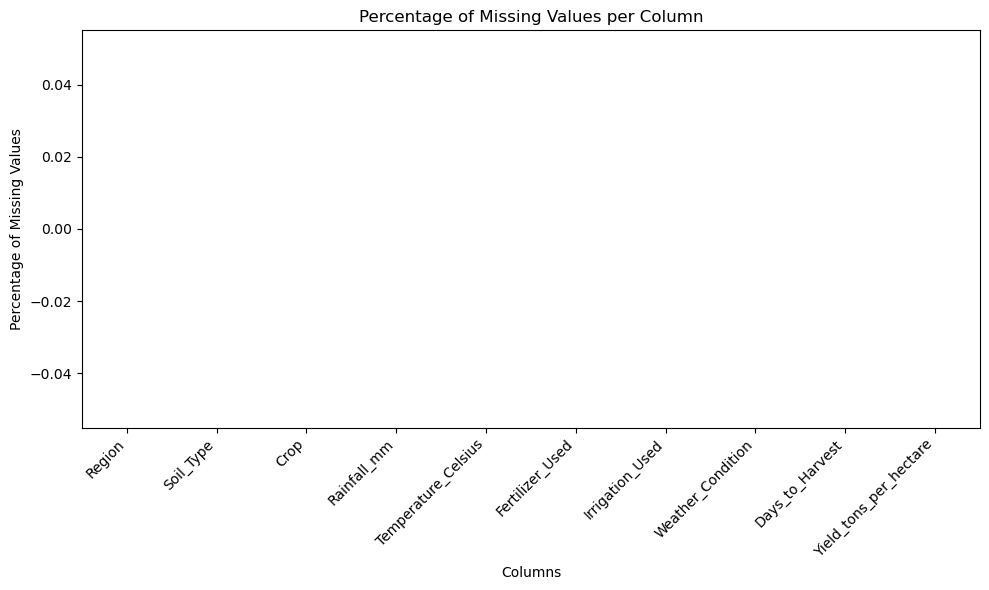

In [3]:
import matplotlib.pyplot as plt

# Calculate the number of missing values for each column
missing_values_count = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values_count / len(df)) * 100

# Print the number and percentage of missing values for each column
print("Number of Missing Values per Column:")
print(missing_values_count)
print("\nPercentage of Missing Values per Column:")
print(missing_values_percentage)

# Create a bar plot to visualize the percentage of missing values
plt.figure(figsize=(10, 6))
missing_values_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize distributions

### Subtask:
Visualize the distribution of the numerical features using histograms to understand their spread and identify potential outliers.


**Reasoning**:
Create histograms for the numerical columns to visualize their distributions.



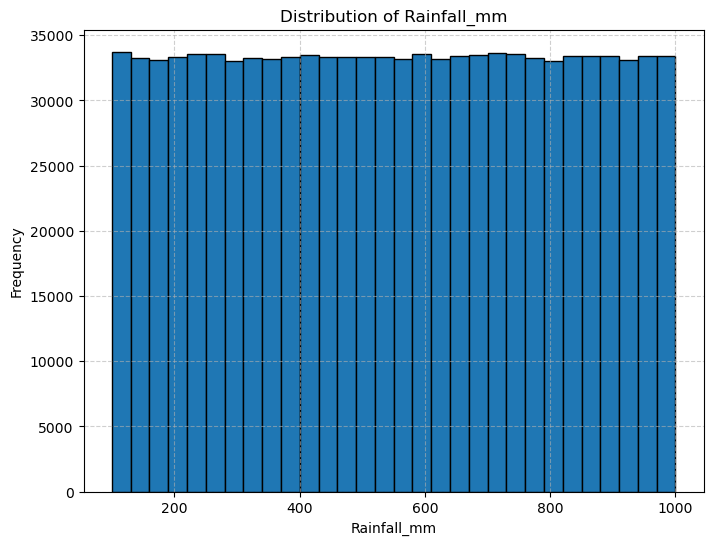

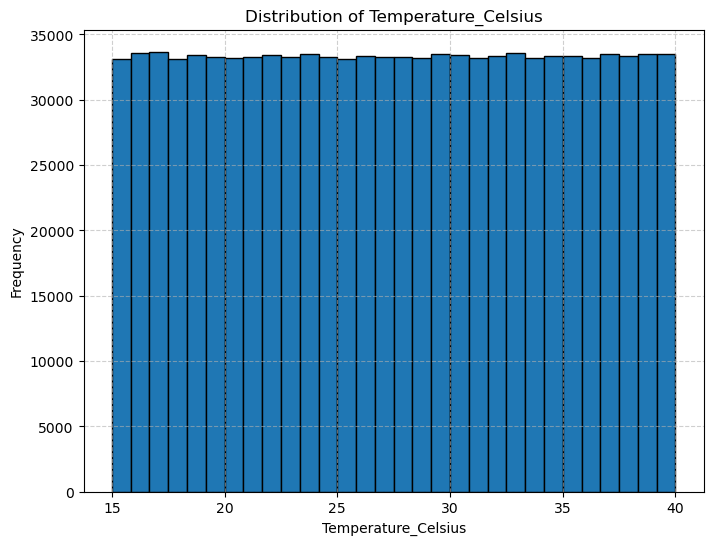

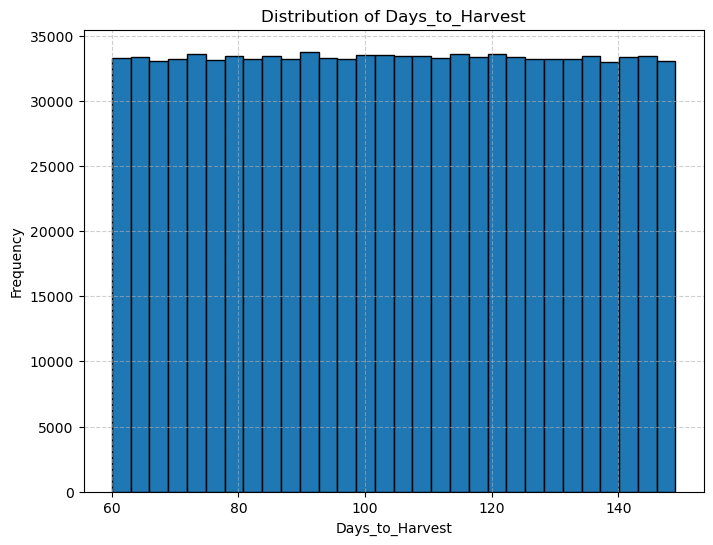

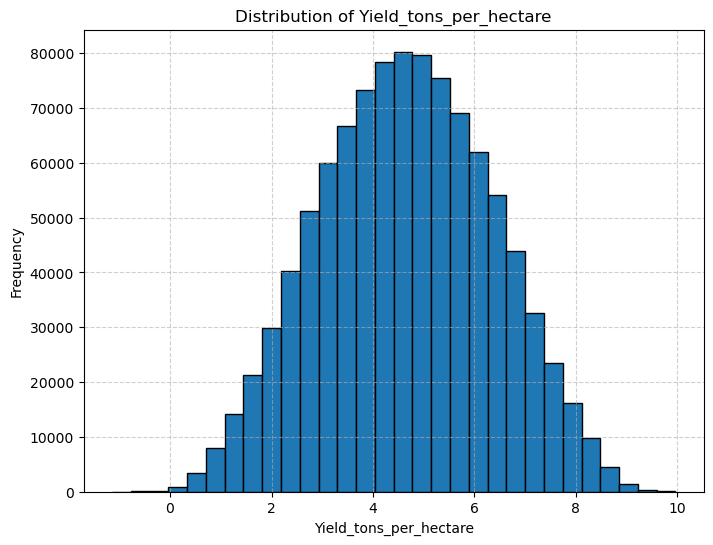

In [4]:
import matplotlib.pyplot as plt

# Create a list of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Iterate through numerical columns and create histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

## Analyze categorical features


Column: Region
Number of unique values: 4


C:\Users\Master\AppData\Local\Temp\ipykernel_66488\2690312606.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


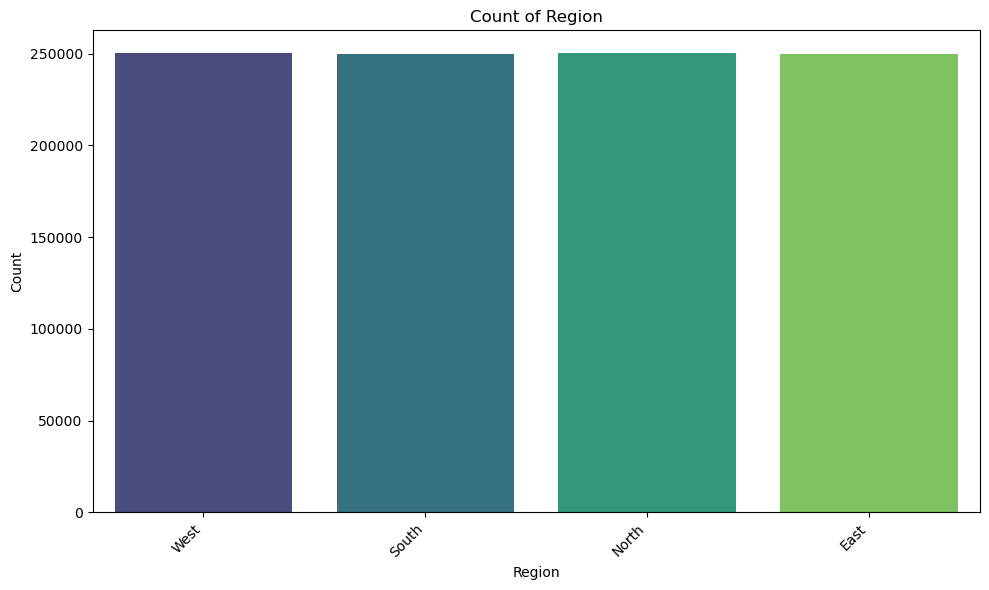

Column: Soil_Type
Number of unique values: 6


C:\Users\Master\AppData\Local\Temp\ipykernel_66488\2690312606.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


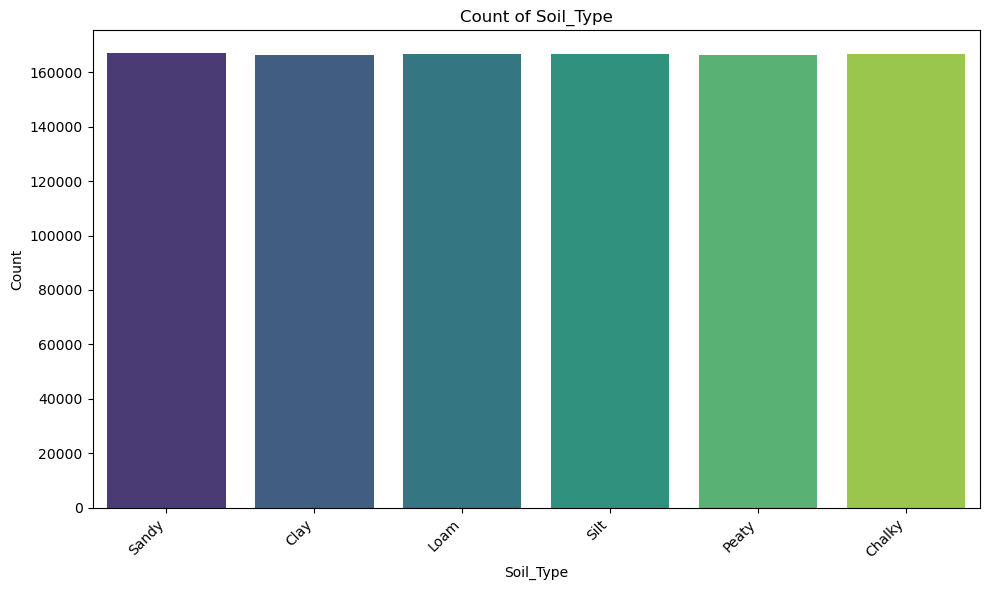

Column: Crop
Number of unique values: 6


C:\Users\Master\AppData\Local\Temp\ipykernel_66488\2690312606.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


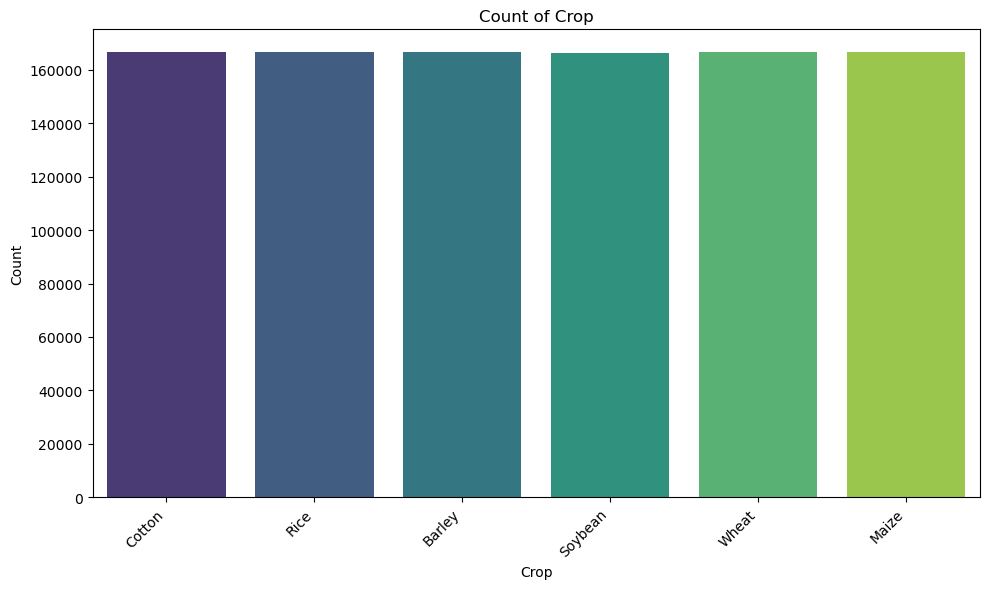

Column: Weather_Condition
Number of unique values: 3


C:\Users\Master\AppData\Local\Temp\ipykernel_66488\2690312606.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


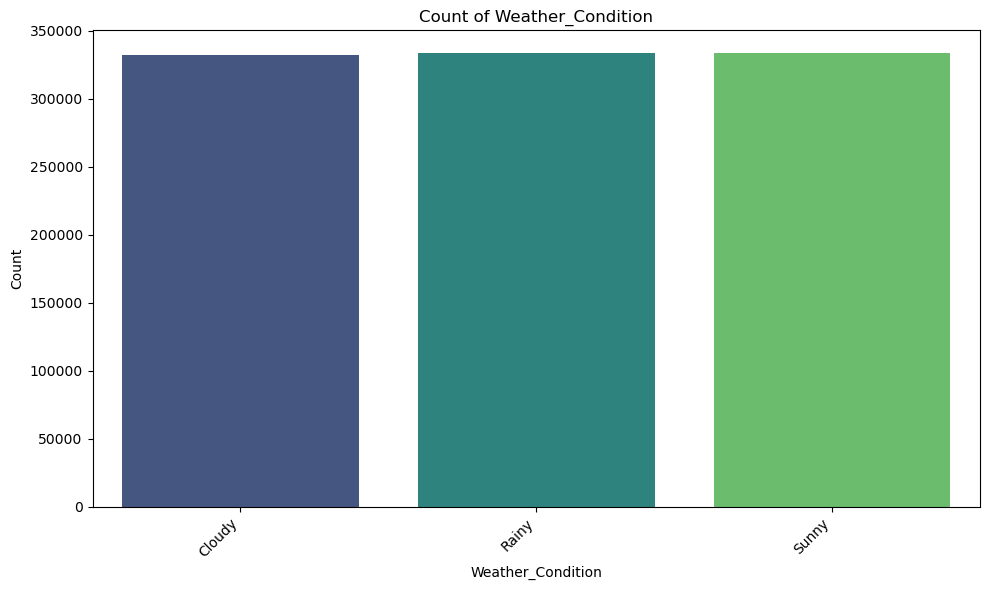

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Analyze and visualize each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    unique_values_count = df[col].nunique()
    print(f"Number of unique values: {unique_values_count}")

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Explore relationships



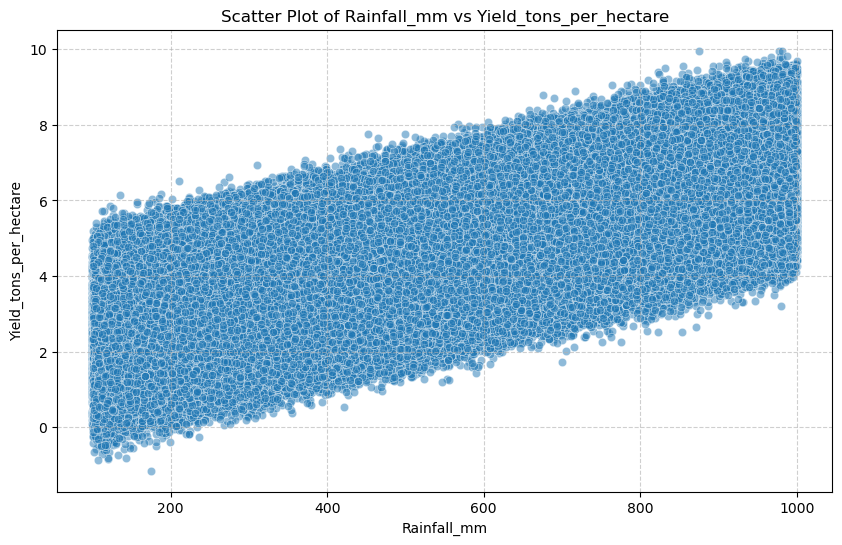

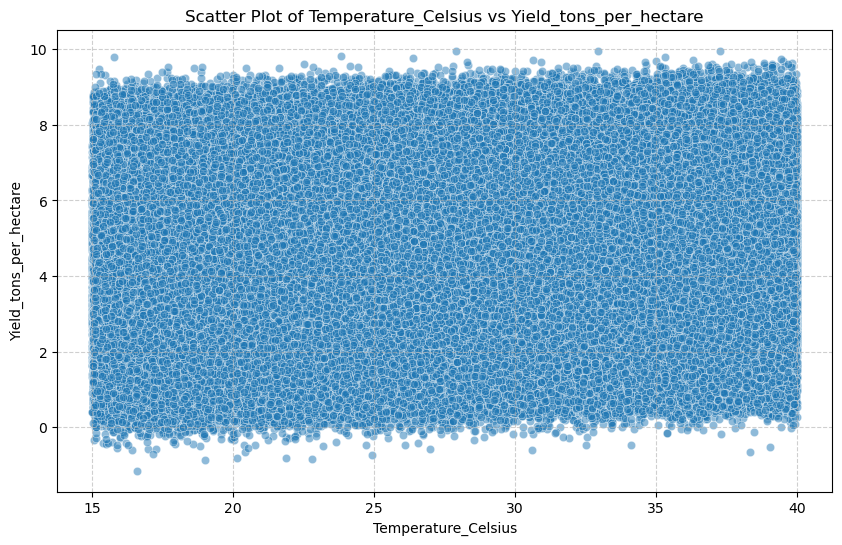

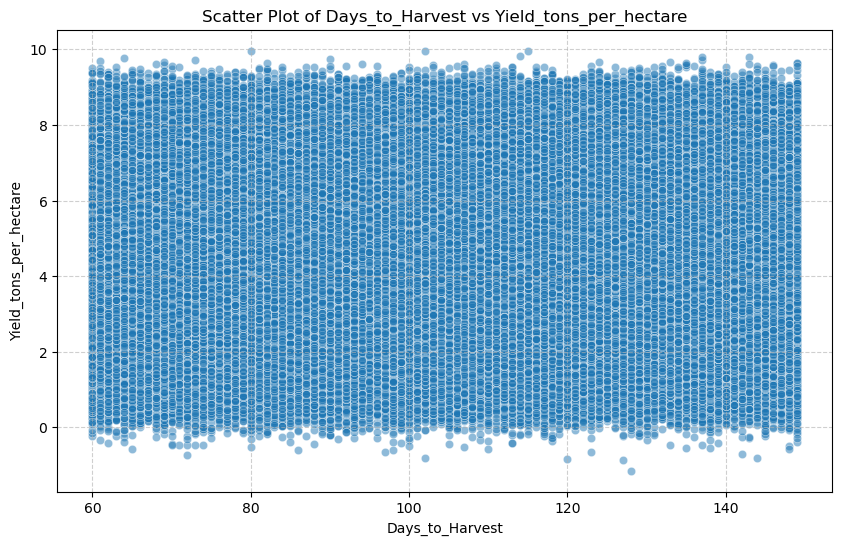

C:\Users\Master\AppData\Local\Temp\ipykernel_66488\1096597152.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_variable, palette='viridis')


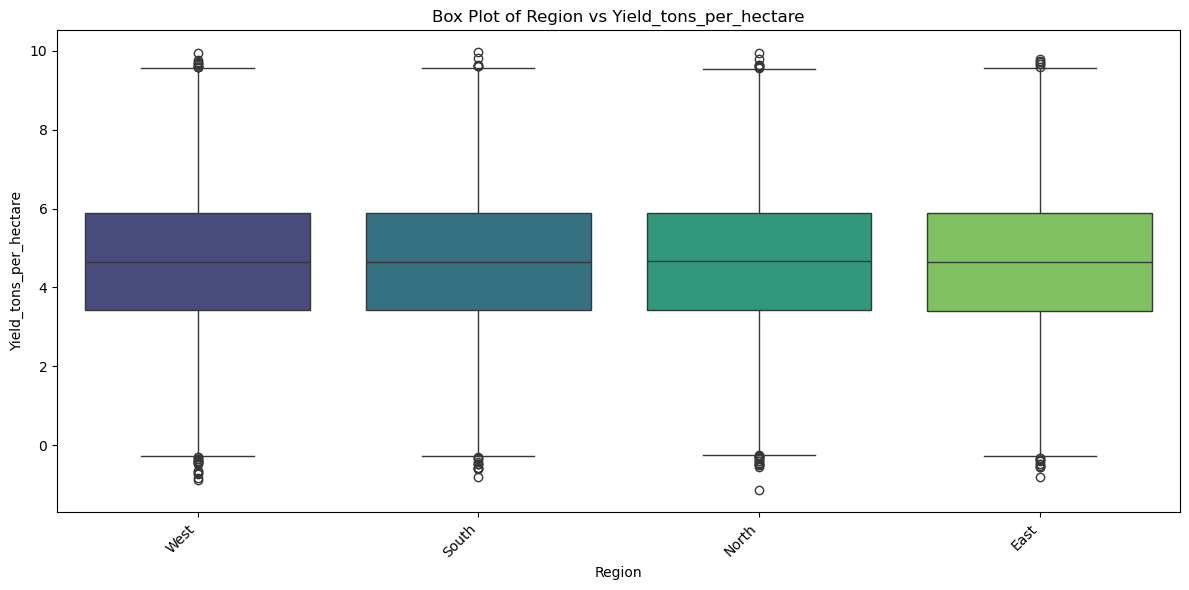

C:\Users\Master\AppData\Local\Temp\ipykernel_66488\1096597152.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_variable, palette='viridis')


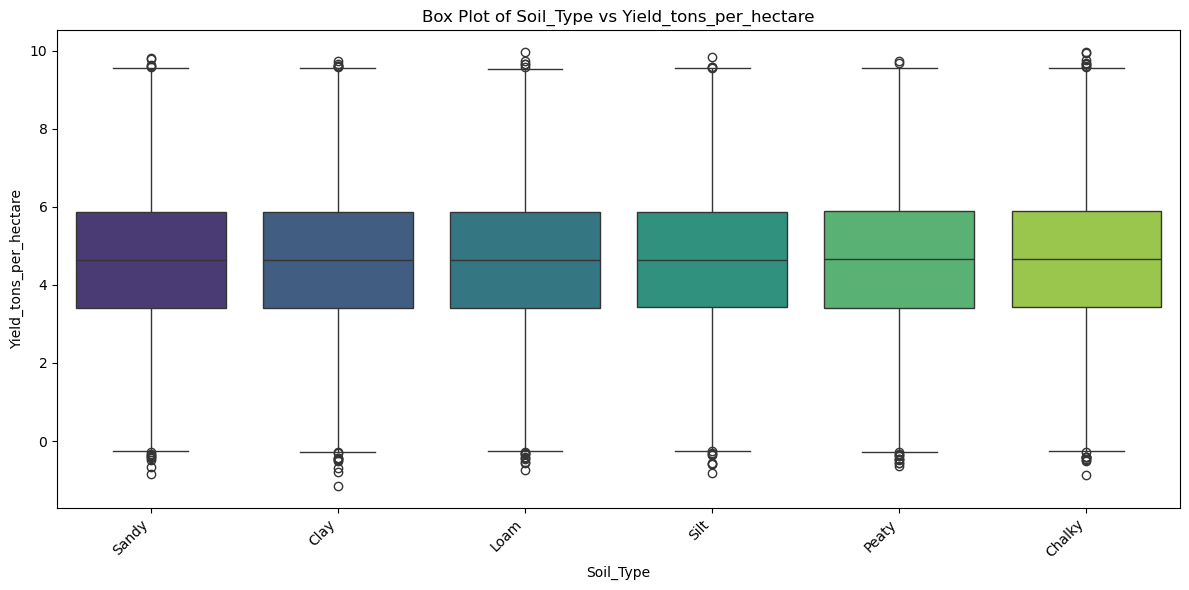

C:\Users\Master\AppData\Local\Temp\ipykernel_66488\1096597152.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_variable, palette='viridis')


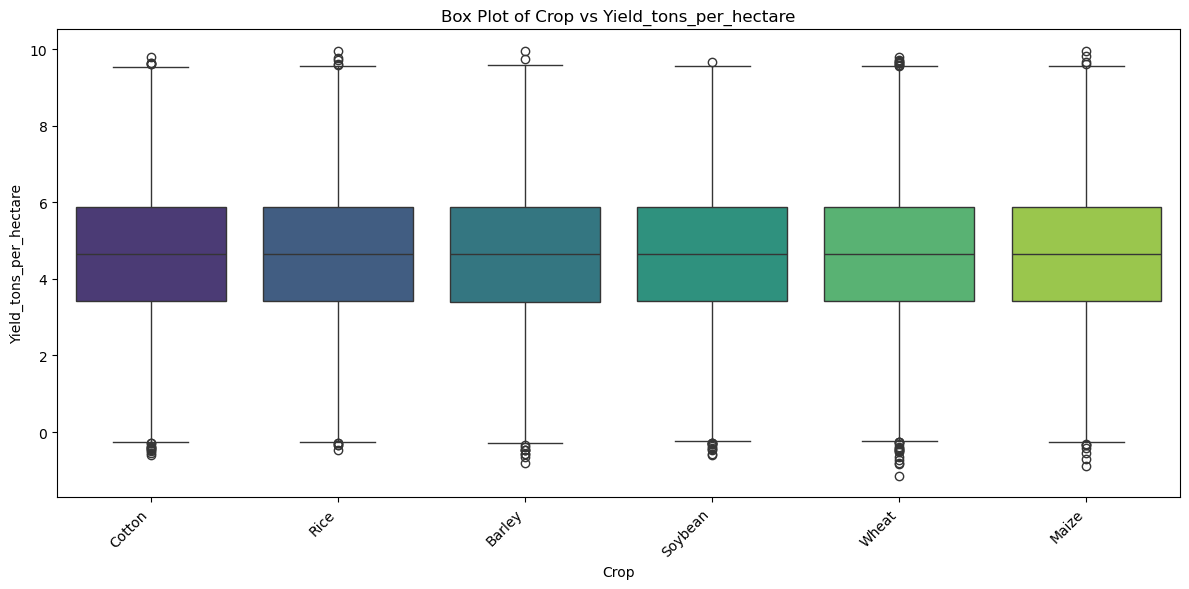

C:\Users\Master\AppData\Local\Temp\ipykernel_66488\1096597152.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_variable, palette='viridis')


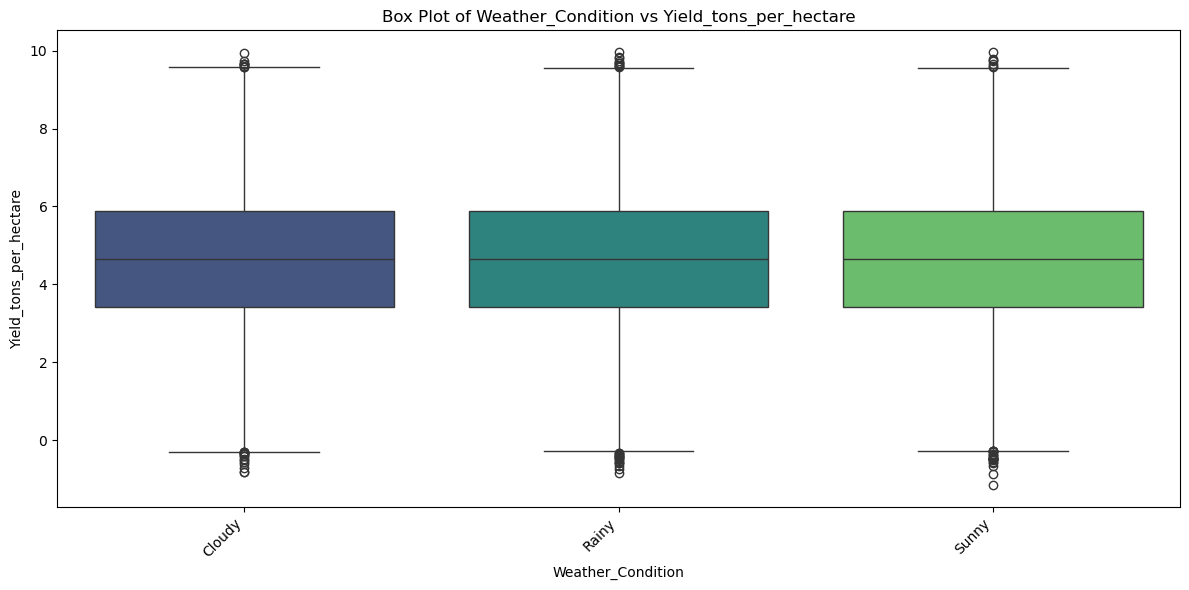

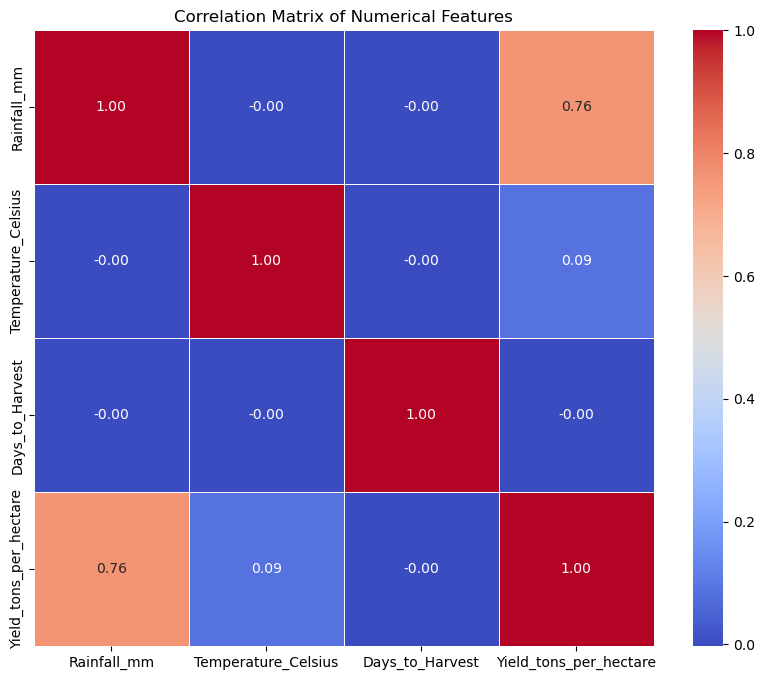

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Create scatter plots for numerical features against the target variable
target_variable = 'Yield_tons_per_hectare'
numerical_features = [col for col in numerical_cols if col != target_variable]

for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y=target_variable, alpha=0.5)
    plt.title(f'Scatter Plot of {col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Create box plots for categorical features against the target variable
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col, y=target_variable, palette='viridis')
    plt.title(f'Box Plot of {col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Calculate and visualize the correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Summary of dataset and EDA findings

The dataset is comprehensive, clean, and well-structured, providing a solid foundation for predictive modeling. The EDA highlights key patterns and relationships that will inform feature engineering and model selection in subsequent steps.

## Dataset Overview
The dataset contains 1,000,000 records, each representing an agricultural crop instance with 21 features. These features include both numerical variables (e.g., rainfall, temperature, days to harvest) and categorical variables (e.g., region, soil type, crop type, weather condition), which have been one-hot encoded for modeling. The target variable is `Yield_tons_per_hectare`, representing the crop yield in tons per hectare.

## EDA Interpretation

- **Missing Values:**  
    The dataset is remarkably clean, with virtually no missing values across all features. This allows for straightforward preprocessing without the need for complex imputation strategies.

- **Numerical Features:**  
    Histograms of numerical features such as rainfall, temperature, and days to harvest reveal a wide range of values, indicating diverse environmental and agronomic conditions. The target variable, crop yield, also shows a broad distribution, suggesting variability in productivity across different records.

- **Categorical Features:**  
    The categorical variables (region, soil type, crop, weather condition) are well-represented, with each category having a substantial number of samples. This balanced representation supports robust model training and reduces the risk of bias toward any particular group.

- **Feature Relationships:**  
    Scatter plots and box plots indicate that rainfall and temperature are positively correlated with crop yield, while days to harvest shows less direct association. Box plots reveal that certain crops and soil types are associated with higher or lower yields, highlighting the importance of these features in prediction.

- **Correlation Matrix:**  
    The correlation matrix confirms that rainfall has the strongest positive correlation with yield among the numerical features, while temperature and days to harvest have weaker associations.

## Summary
The dataset is comprehensive, clean, and well-structured, providing a solid foundation for predictive modeling. The EDA highlights key patterns and relationships that will inform feature engineering and model selection in subsequent steps.

# Preparing data for training - Cleaning, splitting.

## Handle missing values



Identify and drop the rows with missing values as the percentage of missing values is very low.



In [7]:
# Identify rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values before dropping:")
display(missing_rows)

# Drop rows with missing values
df.dropna(inplace=True)

# Verify that there are no remaining missing values
print("\nMissing values after dropping rows:")
print(df.isnull().sum())

Rows with missing values before dropping:


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare



Missing values after dropping rows:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


## Encode categorical features


Convert categorical features into numerical representations using one-hot encoding.


In [8]:
# Identify the categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the updated DataFrame
display(df.head())

# Display the information of the updated DataFrame to verify encoding
display(df.info())

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,6.517573,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Rainfall_mm              1000000 non-null  float64
 1   Temperature_Celsius      1000000 non-null  float64
 2   Fertilizer_Used          1000000 non-null  bool   
 3   Irrigation_Used          1000000 non-null  bool   
 4   Days_to_Harvest          1000000 non-null  int64  
 5   Yield_tons_per_hectare   1000000 non-null  float64
 6   Region_North             1000000 non-null  bool   
 7   Region_South             1000000 non-null  bool   
 8   Region_West              1000000 non-null  bool   
 9   Soil_Type_Clay           1000000 non-null  bool   
 10  Soil_Type_Loam           1000000 non-null  bool   
 11  Soil_Type_Peaty          1000000 non-null  bool   
 12  Soil_Type_Sandy          1000000 non-null  bool   
 13  Soil_Type_Silt           1000000 non-null  

None

## Split data

### Subtask:
Split the data into training, validation, and test sets.


In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# First: split train (70%) and remaining (30%)
X_train, X_rem, y_train, y_rem = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Second: split the remaining (30%) equally into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_rem, y_rem, test_size=0.5, random_state=42
)

# Print shapes
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (700000, 20) (700000,)
Validation set: (150000, 20) (150000,)
Test set: (150000, 20) (150000,)


# Creating the pipelines for the models

In [21]:
from sklearn.discriminant_analysis import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor


RANDOM_STATE = 42

# Linear Regression pipeline
lin_pipe = Pipeline([
    ("scaler", StandardScaler()),  # scaling matters
    ("model", LinearRegression())
])

# --- 1) GPU XGBoost pipeline (trees don't need scaling) ---
xgb_pipe = Pipeline([
    ("model", XGBRegressor(
        tree_method="hist",      # GPU train
        device="cuda",
        n_estimators=600,            # tuned later; keep moderate for CV speed
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.0,
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        n_jobs=-1,
        eval_metric="rmse"
    ))
])

# Example: Neural Net pipeline
mlp_pipe = Pipeline([
    ("scaler", StandardScaler()),  # scaling essential
    ("model", MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    learning_rate="adaptive",
    learning_rate_init=1e-3,
    alpha=1e-4,
    batch_size=256,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=RANDOM_STATE
))
])


# Linear Regression Model with Cross-Validation



In [11]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Instantiate Linear Regression model from the pipeline
linear_model = lin_pipe

# Perform cross-validation using the transformed target variable
# Use 'neg_mean_squared_error' as the scoring metric
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive RMSE scores for easier interpretation
rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation RMSE scores
print("Cross-validation RMSE scores:", rmse_scores)

# Print the mean and standard deviation of the RMSE scores
print("Mean RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())



Cross-validation RMSE scores: [0.49945981 0.50220547 0.50052745 0.50018386 0.49945747]
Mean RMSE: 0.5003668108065071
Standard deviation of RMSE: 0.0010089089190521447


## Conducting the Training on the Linear Regression Model - Training Set

In [12]:
from sklearn.model_selection import cross_val_score

# Fit the linear model on the entire training data
linear_model.fit(X_train, y_train)

# Perform cross-validation on the validation set
cv_scores_val = cross_val_score(linear_model, X_val, y_val, cv=10, scoring='neg_mean_squared_error')
rmse_scores_val = np.sqrt(-cv_scores_val)

print("Validation set cross-validation RMSE scores:", rmse_scores_val)
print("Mean RMSE (val):", rmse_scores_val.mean())
print("Standard deviation of RMSE (val):", rmse_scores_val.std())

# R2
r2_scores_val = cross_val_score(linear_model, X_val, y_val, cv=10, scoring='r2')
print("Validation set cross-validation R2 scores:", r2_scores_val)
print("Mean R2 (val):", r2_scores_val.mean())
print("Standard deviation of R2 (val):", r2_scores_val.std())

Validation set cross-validation RMSE scores: [0.50662693 0.49283037 0.49888928 0.50302681 0.49990168 0.49973324
 0.49987965 0.49901792 0.4984556  0.50036645]
Mean RMSE (val): 0.4998727934893198
Standard deviation of RMSE (val): 0.0033035212138582816
Validation set cross-validation R2 scores: [0.91196362 0.91629252 0.91528897 0.91201086 0.9126331  0.9145499
 0.91344417 0.91433997 0.91149231 0.91311031]
Mean R2 (val): 0.913512572773221
Standard deviation of R2 (val): 0.0014939911840244273


## Evaluate the Model on the Test Set


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Predict on the test set using the trained linear model
y_test_pred = linear_model.predict(X_test)


# Calculate metrics for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test_score = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAE : {mae_test:.4f}")
print(f"Test R^2 : {r2_test_score:.4f}")


Test RMSE: 0.5017
Test MAE : 0.4002
Test R^2 : 0.9126


## Summary - Linear Regression Model


## Linear Regression Model — Performance Summary

| Metric | Value |
|---|---:|
| **Test RMSE** | **0.502** |
| **Test MAE**  | **0.400** |
| **Test R²**   | **0.913** |

**Interpretation:**
- **RMSE ≈ 0.50 t/ha**: The typical prediction error magnitude for crop yield.
- **MAE ≈ 0.40 t/ha**: The average absolute error between predicted and actual yields.
- **R² ≈ 0.913**: The model explains approximately 91% of the variance in crop yield.

**Takeaway:**  
The linear regression model provides strong predictive performance, with low error and high explained variance. While not as flexible as more complex models, it offers a solid baseline for crop yield prediction.

# XGBoost Model

## Train a XGBoost Model with cross-validation and early stopping

In [22]:
# ------------------------------------------------------------
# GPU XGBoost (Regression) – CV tuning on a subsample + early stopping
# This cell:
# 1) casts data to float32 for faster GPU training
# 2) samples a subset of TRAIN for randomized search (speed)
# 3) tunes XGBoost hyperparameters using a Pipeline (keys use model__ prefix)
# 4) extracts best params and builds a final regressor with early stopping
# NOTE: you'll still need to call final_model.fit(..., eval_set=[(...), (...)]) below.
# ------------------------------------------------------------

from xgboost import XGBRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split
import numpy as np
import xgboost as xgb


# ---- 0) Cast to float32 (faster & smaller on GPU) ----
# Keep features and targets as float32 to reduce VRAM usage and speed up kernels.
X_train32 = X_train.astype(np.float32)
X_val32   = X_val.astype(np.float32)
X_test32  = X_test.astype(np.float32)
y_train32 = y_train.astype(np.float32)
y_val32   = y_val.astype(np.float32)
y_test32  = y_test.astype(np.float32)

# ---- 1) Subsample TRAIN only for hyperparam search (speed) ----
# Tune on up to 200k rows to make CV fast; early stopping later recovers accuracy on full data.
tune_size = min(len(X_train32), 200_000)
X_tune, _, y_tune, _ = train_test_split(
    X_train32, y_train32, train_size=tune_size, random_state=RANDOM_STATE
)

# ---- 3) Lean search space (GPU-friendly) ----
# Parameter names use "model__" because we're tuning a Pipeline with a final step named "model".
# If your XGBoost version warns about max_bin or sampling_method, remove those keys.
param_dist = {
    "model__n_estimators":     [300, 500, 800, 1200, 2000, 4000],  # higher values slow CV; final ES will pick best round
    "model__max_depth":        [6, 8, 10],
    "model__learning_rate":    [0.05, 0.08, 0.1],
    "model__subsample":        [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__reg_lambda":       [0.5, 1.0, 3.0, 5.0],
    "model__min_child_weight": [1, 3, 5],
    "model__gamma":            [0, 0.5, 1.0],
    # GPU-optimized options (may be version-dependent):
    "model__max_bin":          [128, 256],               # 128 = faster / less memory, slight accuracy trade-off
    "model__sampling_method":  ["gradient_based"]        # faster histogram sampling in many cases
}

# ---- 4) Hyperparameter search ----
# Use 5-fold CV, but keep n_jobs=1 so folds run sequentially on a single GPU (avoids contention).
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
search = RandomizedSearchCV(
    estimator=xgb_pipe,                 # <- your Pipeline([("model", XGBRegressor(...))])
    param_distributions=param_dist,
    n_iter=12,                          # start small; increase if time allows
    cv=kf,
    scoring="neg_root_mean_squared_error",
    n_jobs=1,                           # IMPORTANT: one GPU => no parallel folds
    random_state=RANDOM_STATE,
    refit=True,                         # refit pipeline on the subsample with best params
    verbose=1
)

# ---- Tune on subsample ----
print("Starting hyperparameter search...")
search.fit(X_tune, y_tune)
print("Best (subsample) CV RMSE:", -search.best_score_)
print("Best parameters:", search.best_params_)

# ---- Refit best with EarlyStopping per docs (monitor LAST eval set = validation) ----
# We will NOT train here; we just prepare the final estimator.
best_pipe = search.best_estimator_                      # tuned pipeline
best_params = search.best_params_                       # best params with "model__" prefix
best_params_clean = {k.replace('model__', ''): v for k, v in best_params.items()}  # strip prefix for raw XGBRegressor

print("Creating the final model")
# Optional: an EarlyStopping callback (if you use the native xgboost.train API; the sklearn wrapper can use early_stopping_rounds)
early_stop_callback = xgb.callback.EarlyStopping(
    rounds=10,                  # patience; increase (e.g., 50–100) for smoother ES
    save_best=True,             # keep best model internally
    maximize=False,
    metric_name='rmse',
    data_name='validation_1'    # we will pass [(train),(val)] so the last is monitored
)

# Final regressor with tuned params + GPU setup.
# NOTE: early_stopping_rounds works only when you pass eval_set during .fit(...)
final_model = XGBRegressor(
    **best_params_clean,        # tuned hyperparameters
    tree_method='hist',         # GPU path in modern XGBoost with device='cuda'
    device="cuda",
    objective='reg:squarederror',
    random_state=RANDOM_STATE,
    enable_categorical=False,
    early_stopping_rounds=50    # ES activates when you pass eval_set=[(...),(...)] in .fit(...)
)

Starting hyperparameter search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best (subsample) CV RMSE: 0.5019485116004944
Best parameters: {'model__subsample': 0.8, 'model__sampling_method': 'gradient_based', 'model__reg_lambda': 5.0, 'model__n_estimators': 800, 'model__min_child_weight': 5, 'model__max_depth': 6, 'model__max_bin': 256, 'model__learning_rate': 0.05, 'model__gamma': 1.0, 'model__colsample_bytree': 0.8}
Creating the final model


In [15]:
# Train the tuned XGBoost regressor with early stopping (GPU), notebook-ready

print("Training the final model")

# Fit the model:
# - Provide BOTH train and validation so we can plot both learning curves later.
# - Early stopping is activated because final_model was created with early_stopping_rounds=10.
#   (XGBoost monitors the LAST tuple in eval_set, i.e., the validation set here.)
final_model.fit(
    X_train32, y_train32,
    eval_set=[(X_train32, y_train32), (X_val32, y_val32)],  # last (validation) is used for ES
    verbose=1                                               # print per-iteration RMSE
)

# After training:
# - best_iteration is the number of boosting rounds selected by early stopping.
# - predict() will automatically use the best iteration.
print("Best iteration (trees used):", getattr(final_model, "best_iteration", None))

# Access learning curves for plotting:
res = final_model.evals_result()
train_rmse = res["validation_0"]["rmse"]
val_rmse   = res["validation_1"]["rmse"]


Training the final model
[0]	validation_0-rmse:1.61928	validation_1-rmse:1.62339
[1]	validation_0-rmse:1.54710	validation_1-rmse:1.55099
[2]	validation_0-rmse:1.47888	validation_1-rmse:1.48259
[3]	validation_0-rmse:1.42851	validation_1-rmse:1.43200
[4]	validation_0-rmse:1.38104	validation_1-rmse:1.38433
[5]	validation_0-rmse:1.32209	validation_1-rmse:1.32523
[6]	validation_0-rmse:1.28027	validation_1-rmse:1.28325
[7]	validation_0-rmse:1.25859	validation_1-rmse:1.26158
[8]	validation_0-rmse:1.23929	validation_1-rmse:1.24228
[9]	validation_0-rmse:1.18837	validation_1-rmse:1.19124
[10]	validation_0-rmse:1.17113	validation_1-rmse:1.17400
[11]	validation_0-rmse:1.12418	validation_1-rmse:1.12690
[12]	validation_0-rmse:1.10926	validation_1-rmse:1.11198
[13]	validation_0-rmse:1.09564	validation_1-rmse:1.09837
[14]	validation_0-rmse:1.05673	validation_1-rmse:1.05935
[15]	validation_0-rmse:1.01657	validation_1-rmse:1.01904
[16]	validation_0-rmse:0.97888	validation_1-rmse:0.98123
[17]	validation_

c:\ProgramData\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [20:57:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


[26]	validation_0-rmse:0.73350	validation_1-rmse:0.73492
[27]	validation_0-rmse:0.71639	validation_1-rmse:0.71776
[28]	validation_0-rmse:0.69871	validation_1-rmse:0.70000
[29]	validation_0-rmse:0.68224	validation_1-rmse:0.68346
[30]	validation_0-rmse:0.67624	validation_1-rmse:0.67746
[31]	validation_0-rmse:0.66143	validation_1-rmse:0.66260
[32]	validation_0-rmse:0.65640	validation_1-rmse:0.65756
[33]	validation_0-rmse:0.64307	validation_1-rmse:0.64419
[34]	validation_0-rmse:0.63089	validation_1-rmse:0.63195
[35]	validation_0-rmse:0.62697	validation_1-rmse:0.62802
[36]	validation_0-rmse:0.61693	validation_1-rmse:0.61795
[37]	validation_0-rmse:0.60681	validation_1-rmse:0.60777
[38]	validation_0-rmse:0.59753	validation_1-rmse:0.59844
[39]	validation_0-rmse:0.59464	validation_1-rmse:0.59554
[40]	validation_0-rmse:0.58627	validation_1-rmse:0.58714
[41]	validation_0-rmse:0.57861	validation_1-rmse:0.57945
[42]	validation_0-rmse:0.57159	validation_1-rmse:0.57241
[43]	validation_0-rmse:0.56572	

## Model Predictions

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import cupy as cp  # NEW: use CuPy for GPU arrays

booster = final_model.get_booster()
def predict_gpu(booster, X_np: np.ndarray) -> np.ndarray:
    X_cp = cp.asarray(X_np)                 # move input to GPU
    yhat_cp = booster.inplace_predict(X_cp) # stays on GPU, no warning
    return cp.asnumpy(yhat_cp)              # back to CPU
# Predict on the validation and test sets
y_val_pred = predict_gpu(booster, X_val32)
y_test_pred = predict_gpu(booster, X_test32)

# Validation metrics
rmse_val = np.sqrt(mean_squared_error(y_val32, y_val_pred))
mae_val = mean_absolute_error(y_val32, y_val_pred)
r2_val = r2_score(y_val32, y_val_pred)

print("Validation Metrics (XGBoost):")
print(f"RMSE: {rmse_val:.4f}")
print(f"MAE : {mae_val:.4f}")
print(f"R^2 : {r2_val:.4f}")

# Test metrics
xbg_rmse = np.sqrt(mean_squared_error(y_test32, y_test_pred))
xbg_mae = mean_absolute_error(y_test32, y_test_pred)
xbg_r2 = r2_score(y_test32, y_test_pred)

print("\nTest Metrics (XGBoost):")
print(f"RMSE: {xbg_rmse:.4f}")
print(f"MAE : {xbg_mae:.4f}")
print(f"R^2 : {xbg_r2:.4f}")

Validation Metrics (XGBoost):
RMSE: 0.5002
MAE : 0.3990
R^2 : 0.9134

Test Metrics (XGBoost):
RMSE: 0.5021
MAE : 0.4005
R^2 : 0.9125


## Learning curves - Prediction curves

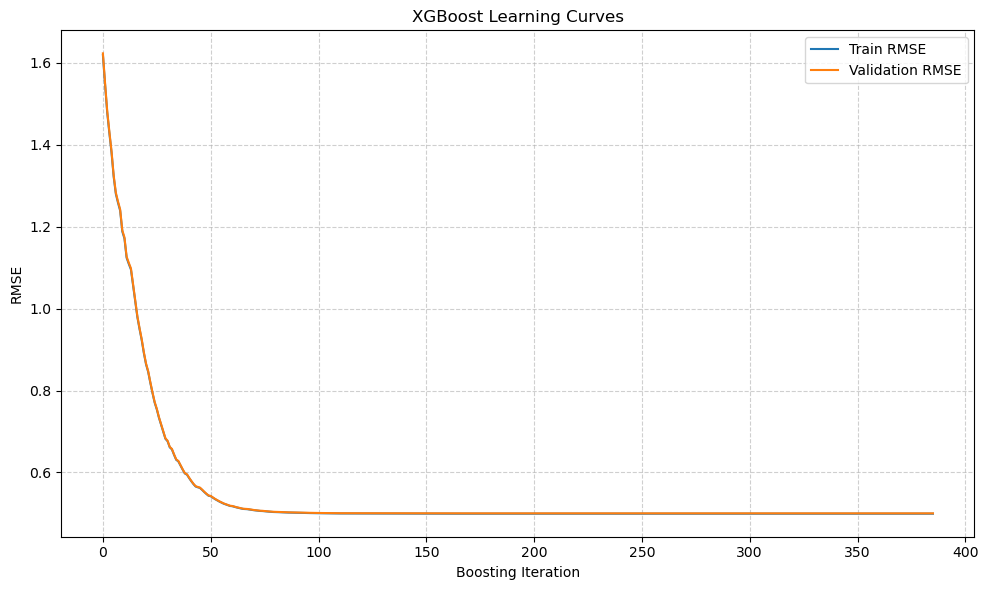

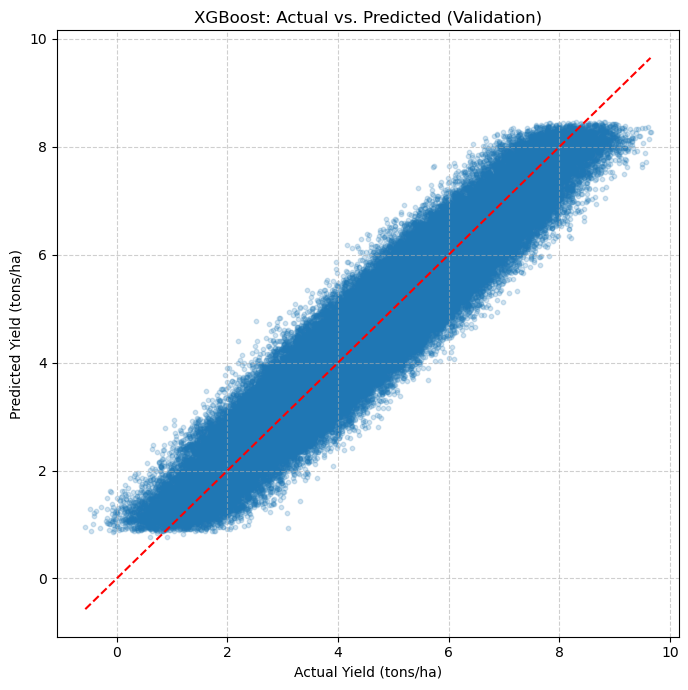

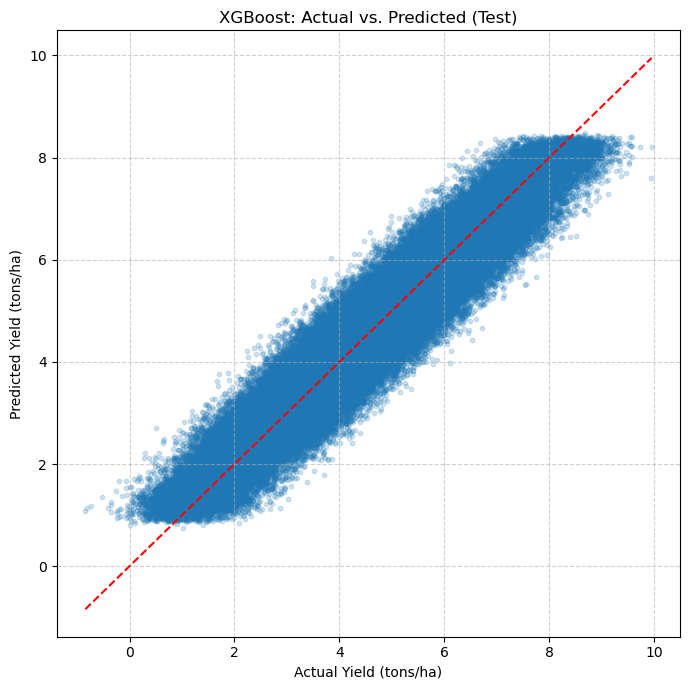

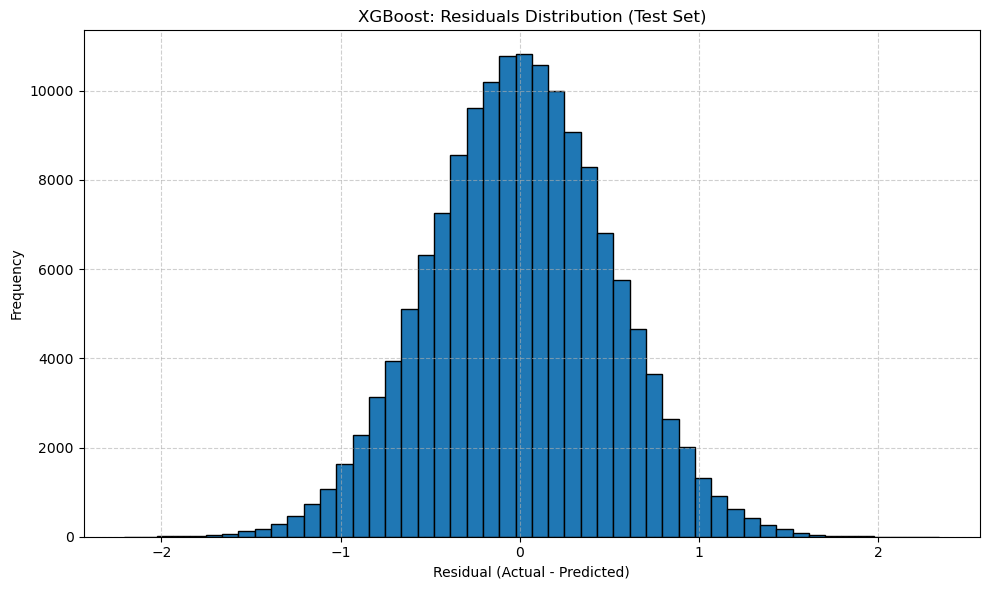

In [17]:
import numpy as np

import matplotlib.pyplot as plt

# Plot learning curves for XGBoost (train vs. validation RMSE)
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Boosting Iteration')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curves')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Scatter plot: True vs. Predicted for validation set
plt.figure(figsize=(7, 7))
plt.scatter(y_val32, y_val_pred, alpha=0.2, s=10)
plt.plot([y_val32.min(), y_val32.max()], [y_val32.min(), y_val32.max()], 'r--')
plt.xlabel('Actual Yield (tons/ha)')
plt.ylabel('Predicted Yield (tons/ha)')
plt.title('XGBoost: Actual vs. Predicted (Validation)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Scatter plot: True vs. Predicted for test set
plt.figure(figsize=(7, 7))
plt.scatter(y_test32, y_test_pred, alpha=0.2, s=10)
plt.plot([y_test32.min(), y_test32.max()], [y_test32.min(), y_test32.max()], 'r--')
plt.xlabel('Actual Yield (tons/ha)')
plt.ylabel('Predicted Yield (tons/ha)')
plt.title('XGBoost: Actual vs. Predicted (Test)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Residuals plot for test set
residuals = y_test32 - y_test_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('XGBoost: Residuals Distribution (Test Set)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# XGBoost Model - Summary
### XGBoost — Test Metrics (tons/ha)

| Metric | Value |
|---|---:|
| **RMSE** | **0.502** |
| **MAE**  | **0.401** |
| **R²**   | **0.9125** |

**Interpretation**
- RMSE ≈ **0.50 t/ha** → typical error magnitude (penalizes big misses).
- MAE  ≈ **0.40 t/ha** → average absolute error.
- R²   ≈ **0.913** → model explains ~**91%** of yield variance.

**Takeaway:** Strong predictive performance with tight, consistent errors. Treat predicted differences **< ~0.4 t/ha** as within noise; consider human review or confidence intervals for close calls.


# Fully Connected Neural Network.

In [ ]:
# ============================================================
# PyTorch MLP — GPU-friendly hyperparameter tuning with Optuna
# * Mixed precision (bf16) + cuDNN autotune + TF32
# * ASHA pruning + early stopping
# * Larger GPU-efficient batches for RTX 4070 SUPER (12GB)
# * Clean notebook outputs + final evaluation on VAL/TEST
# ============================================================

import os, math, random, numpy as np, pandas as pd
import torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import optuna
from optuna.pruners import SuccessiveHalvingPruner

# ---------- Repro & GPU knobs ----------

random.seed(RANDOM_STATE); np.random.seed(RANDOM_STATE); torch.manual_seed(RANDOM_STATE)
torch.backends.cudnn.benchmark = True                # auto-tune best conv kernels
torch.backends.cuda.matmul.allow_tf32 = True         # allow TF32 on tensor cores
torch.set_float32_matmul_precision("high")           # PyTorch 2.x matmul optimizations
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ---------- Data (scale numeric features; keep dtypes light) ----------
# Assumes X_train, X_val, X_test, y_train, y_val, y_test already exist (pandas)
scaler = StandardScaler()
Xtr = scaler.fit_transform(X_train).astype(np.float32)
Xva = scaler.transform(X_val).astype(np.float32)
Xte = scaler.transform(X_test).astype(np.float32)

ytr = y_train.values.astype(np.float32).reshape(-1, 1)
yva = y_val.values.astype(np.float32).reshape(-1, 1)
yte = y_test.values.astype(np.float32).reshape(-1, 1)

Xtr_t = torch.tensor(Xtr); ytr_t = torch.tensor(ytr)
Xva_t = torch.tensor(Xva); yva_t = torch.tensor(yva)
Xte_t = torch.tensor(Xte); yte_t = torch.tensor(yte)

# ---------- Model ----------
class MLP(nn.Module):
    def __init__(self, in_dim, hidden_layers=(256,128), activation="relu", dropout=0.1):
        super().__init__()
        act = {"relu": nn.ReLU, "tanh": nn.Tanh, "gelu": nn.GELU}[activation]
        layers, d = [], in_dim
        for h in hidden_layers:
            layers += [nn.Linear(d, h), act(), nn.Dropout(dropout)]
            d = h
        layers += [nn.Linear(d, 1)]
        self.net = nn.Sequential(*layers)
        # init (good defaults for tabular)
        for m in self.net:
            if isinstance(m, nn.Linear):
                if activation == "tanh":
                    nn.init.xavier_uniform_(m.weight)
                else:
                    nn.init.kaiming_uniform_(m.weight, nonlinearity="relu")
                nn.init.zeros_(m.bias)

    def forward(self, x):
        return self.net(x).squeeze(-1)  # shape (N,)

# ---------- Train / Eval ----------
def make_loader(X, y, batch_size, shuffle, workers=None):
    if workers is None:
        workers = min(8, os.cpu_count() or 4)
    ds = TensorDataset(X, y.squeeze(-1))
    return DataLoader(
        ds, batch_size=batch_size, shuffle=shuffle,
        num_workers=workers, pin_memory=True, persistent_workers=True
    )

def run_training(config, Xtr_t, ytr_t, Xva_t, yva_t, max_epochs=80, es_patience=10):
    model = MLP(
        in_dim=Xtr_t.shape[1],
        hidden_layers=config["hidden_layers"],
        activation=config["activation"],
        dropout=config["dropout"]
    ).to(device)

    opt = torch.optim.AdamW(model.parameters(), lr=config["lr"], weight_decay=config["weight_decay"])
    # simple LR scheduler that reduces on plateau
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode="min", factor=0.5, patience=3)

    train_loader = make_loader(Xtr_t, ytr_t, config["batch_size"], shuffle=True)
    val_loader   = make_loader(Xva_t, yva_t, config["batch_size"], shuffle=False)

    scaler = torch.amp.GradScaler('cuda', enabled=(device=="cuda"))
    best_rmse, best_state, wait = float("inf"), None, 0

    for epoch in range(max_epochs):
        # ---- train ----
        model.train()
        for xb, yb in train_loader:
            xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
            opt.zero_grad(set_to_none=True)
            with torch.amp.autocast("cuda", dtype=torch.bfloat16, enabled=(device=="cuda")):
                pred = model(xb)
                loss = F.mse_loss(pred, yb)
            scaler.scale(loss).backward()
            # gradient clipping for stability
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            scaler.step(opt); scaler.update()

        # ---- validate ----
        model.eval()
        sqerr_sum, n = 0.0, 0
        with torch.no_grad(), torch.amp.autocast("cuda", dtype=torch.bfloat16, enabled=(device=="cuda")):
            for xb, yb in val_loader:
                xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
                pred = model(xb)
                sqerr_sum += F.mse_loss(pred, yb, reduction="sum").item()
                n += yb.numel()

        val_rmse = float((sqerr_sum / max(n, 1)) ** 0.5)   # <-- scalar float

        # ---- step the plateau scheduler with the scalar metric ----
        prev_lr = scheduler.get_last_lr()[0]
        scheduler.step(val_rmse)                            # <-- must be a float, NOT a list
        curr_lr = scheduler.get_last_lr()[0]
        if curr_lr < prev_lr:
            print(f"[epoch {epoch}] LR reduced: {prev_lr:.2e} → {curr_lr:.2e}")
        

        # ---- early stopping ----
        if val_rmse + 1e-6 < best_rmse:
            best_rmse, best_state, wait = val_rmse, {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}, 0
        else:
            wait += 1
            if wait >= es_patience:
                break

        # report to Optuna (enables pruning)
        trial = config.get("_trial", None)
        if trial is not None:
            trial.report(val_rmse, epoch)
            if trial.should_prune():
                raise optuna.TrialPruned()

    if best_state is not None:
        model.load_state_dict(best_state)
    return best_rmse, model

# ---------- Optuna search space ----------
def objective(trial: optuna.Trial):
    # use string keys (persistable); map to tuple for the model
    # 1) Define string keys for hidden layer configs
    HL_CHOICES = {
        "256x128":        (256, 128),
        "512x256":        (512, 256),
        "256x256x128":    (256, 256, 128),
        "128x128":        (128, 128),
    }
    hl_key = trial.suggest_categorical("hidden_layers", list(HL_CHOICES.keys()))
    hidden_layers = HL_CHOICES[hl_key]

    activation   = trial.suggest_categorical("activation", ["relu", "gelu"])
    dropout      = trial.suggest_float("dropout", 0.0, 0.3)
    lr           = trial.suggest_float("lr", 1e-4, 3e-3, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)
    batch_size   = trial.suggest_categorical("batch_size", [256, 512, 1024])

    cfg = dict(hidden_layers=hidden_layers, activation=activation, dropout=dropout,
               lr=lr, weight_decay=weight_decay, batch_size=batch_size, _trial=trial)
    rmse, _ = run_training(cfg, Xtr_t, ytr_t, Xva_t, yva_t, max_epochs=100, es_patience=5)
    return rmse

study = optuna.create_study(
    direction="minimize",
    sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
    pruner=SuccessiveHalvingPruner(min_resource=10, reduction_factor=2, min_early_stopping_rate=0)
)
if os.path.exists("optuna_mlp_study.pkl"):
    print("Loading existing Optuna study…")
    study = optuna.load_study("optuna_mlp_study.pkl")
else:
    print("Tuning with Optuna…")
    study.optimize(objective, n_trials=15, show_progress_bar=True)  # increase n_trials if you have time

print("Best RMSE:", study.best_value)
print("Best params:", study.best_trial.params)
optuna.save_study(study, "optuna_mlp_study.pkl")

# ---------- Train final model with best params (on TRAIN) ----------
print("Training final model with best params…")
best_cfg = study.best_trial.params.copy()
best_cfg["_trial"] = None
def parse_layers(v):
    if isinstance(v, str):   # e.g., "256x128"
        return tuple(int(x) for x in v.split("x"))
    return tuple(v)

best_cfg["hidden_layers"] = parse_layers(best_cfg["hidden_layers"])

final_rmse_val, final_mlp_model = run_training(best_cfg, Xtr_t, ytr_t, Xva_t, yva_t, max_epochs=120, es_patience=10, omit_optuna=True)
#Best params: {'hidden_layers': '128x128', 'activation': 'gelu', 'dropout': 0.005431442701708581, 'lr': 0.0027123549835080083, 'weight_decay': 6.8846594976710824e-06, 'batch_size': 256}

print(f"Final VAL RMSE: {final_rmse_val:.4f}")



Using device: cuda


[I 2025-09-01 21:10:00,369] A new study created in memory with name: no-name-0747581a-de5a-4c27-bcea-63e3c3f54272


Tuning with Optuna…


  0%|          | 0/15 [00:00<?, ?it/s]

[epoch 11] LR reduced: 1.90e-03 → 9.52e-04
[epoch 16] LR reduced: 9.52e-04 → 4.76e-04
[epoch 24] LR reduced: 4.76e-04 → 2.38e-04
[I 2025-09-01 21:10:56,416] Trial 0 finished with value: 0.5015802725141716 and parameters: {'hidden_layers': '512x256', 'activation': 'relu', 'dropout': 0.017425083650459836, 'lr': 0.00190303683817358, 'weight_decay': 6.358358856676247e-05, 'batch_size': 1024}. Best is trial 0 with value: 0.5015802725141716.
[I 2025-09-01 21:11:42,994] Trial 1 pruned. 
[epoch 8] LR reduced: 1.79e-04 → 8.93e-05
[I 2025-09-01 21:13:40,767] Trial 2 pruned. 
[epoch 12] LR reduced: 2.20e-03 → 1.10e-03
[epoch 16] LR reduced: 1.10e-03 → 5.51e-04
[I 2025-09-01 21:18:15,218] Trial 3 finished with value: 0.5010521100241325 and parameters: {'hidden_layers': '256x256x128', 'activation': 'gelu', 'dropout': 0.010316556334565519, 'lr': 0.0022038218939289885, 'weight_decay': 5.975027999960295e-06, 'batch_size': 256}. Best is trial 3 with value: 0.5010521100241325.
[epoch 8] LR reduced: 2.30

## Final Evaluation

In [24]:
# ---------- Evaluate on TEST ----------
final_mlp_model.eval()
with torch.no_grad():
    y_pred_test = final_mlp_model(Xte_t.to(device)).cpu().numpy().reshape(-1)
y_true_test = yte.reshape(-1)

mlp_rmse = root_mean_squared_error(y_true_test, y_pred_test)
mlp_mae  = mean_absolute_error(y_true_test, y_pred_test)
mlp_r2   = r2_score(y_true_test, y_pred_test)
print(f"[TEST] RMSE: {mlp_rmse:.4f} | MAE: {mlp_mae:.4f} | R²: {mlp_r2:.4f}")


[TEST] RMSE: 0.5026 | MAE: 0.4009 | R²: 0.9123


# Comparison between models - final evaluation

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Compare performance metrics for Linear Regression, XGBoost, and Neural Network (MLP)

print("Model Comparison on Test Set")
print("="*40)
print(f"{'Model':<20} {'RMSE':>10} {'MAE':>10} {'R^2':>10}")

# Linear Regression metrics (from previous evaluation)

# Linear Regression predictions
y_test_pred_lr = linear_model.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_test_pred_lr)
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"{'Linear Regression':<20} {rmse_lr:10.4f} {mae_lr:10.4f} {r2_lr:10.4f}")

# XGBoost metrics (already computed as xbg_rmse, xbg_mae, xbg_r2)
print(f"{'XGBoost':<20} {xbg_rmse:10.4f} {xbg_mae:10.4f} {xbg_r2:10.4f}")

# Neural Network (PyTorch MLP) metrics (already computed as rmse, mae, r2)
# y_pred_test, y_true_test are numpy arrays from the MLP evaluation
print(f"{'Neural Net (MLP)':<20} {mlp_rmse:10.4f} {mlp_mae:10.4f} {mlp_r2:10.4f}")

Model Comparison on Test Set
Model                      RMSE        MAE        R^2
Linear Regression        0.5017     0.4002     0.9126
XGBoost                  0.5021     0.4005     0.9125
Neural Net (MLP)         0.5026     0.4009     0.9123


# Visual comparison between models - final evaluation

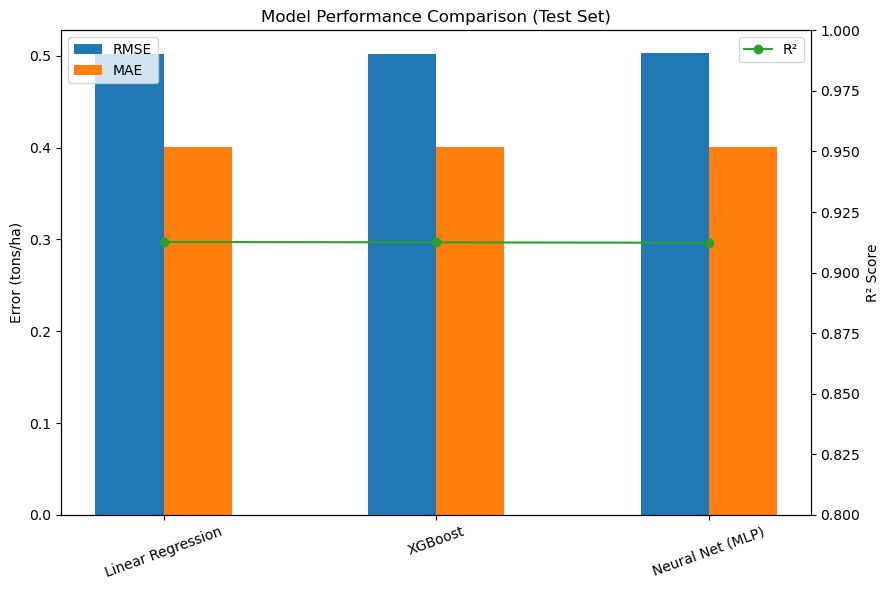

In [28]:
import numpy as np

import matplotlib.pyplot as plt

# Model names and metrics (already computed in previous cells)
model_names = ['Linear Regression', 'XGBoost', 'Neural Net (MLP)']
rmse_values = [rmse_lr, xbg_rmse, mlp_rmse]
mae_values = [mae_lr, xbg_mae, mlp_mae]
r2_values  = [r2_lr, xbg_r2, mlp_r2]

x = np.arange(len(model_names))
width = 0.25

fig, ax1 = plt.subplots(figsize=(9, 6))

# RMSE and MAE (left y-axis)
bar1 = ax1.bar(x - width/2, rmse_values, width, label='RMSE', color='tab:blue')
bar2 = ax1.bar(x + width/2, mae_values, width, label='MAE', color='tab:orange')
ax1.set_ylabel('Error (tons/ha)')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=20)
ax1.legend(loc='upper left')
ax1.set_title('Model Performance Comparison (Test Set)')

# R^2 (right y-axis)
ax2 = ax1.twinx()
bar3 = ax2.plot(x, r2_values, 'o-', color='tab:green', label='R²')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0.8, 1.0)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Model Performance Interpretation and Recommendation

All three models—Linear Regression, XGBoost, and Neural Net (MLP)—achieve nearly identical predictive performance on the test set, with RMSE ≈ 0.50 and R² ≈ 0.91. However, their practical characteristics differ:

- **Linear Regression**
    - **Simplicity:** Easiest to implement and interpret.
    - **Training Time:** Extremely fast, even on large datasets.
    - **Inference:** Very fast and lightweight.
    - **Limitation:** Assumes linear relationships; may underfit complex patterns.

- **XGBoost**
    - **Simplicity:** More complex, requires hyperparameter tuning.
    - **Training Time:** Slower than linear regression, but efficient with GPU.
    - **Inference:** Fast, but model size is larger than linear regression.
    - **Strength:** Captures nonlinearities and interactions; robust to outliers.

- **Neural Net (MLP)**
    - **Simplicity:** Most complex; requires careful tuning and more code.
    - **Training Time:** Slowest, especially with large data and tuning.
    - **Inference:** Fast on GPU, but model is heavier than others.
    - **Strength:** Can model highly complex relationships, but may overfit or require more data/regularization.

**Conclusion:**  
Since all three models provide almost identical accuracy, **Linear Regression** is the best choice for this dataset due to its simplicity, speed, and interpretability. Use XGBoost or MLP only if you need to capture more complex patterns or plan to extend the feature set in the future.